# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousedata_studyresults = pd.merge(study_results,mouse_metadata,how = "left", on="Mouse ID")


# Display the data table for preview
mousedata_studyresults.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = mousedata_studyresults["Mouse ID"].nunique()
print(mouse_count)

249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = mousedata_studyresults [["Mouse ID", "Timepoint"]].value_counts()
duplicates = duplicate_mouse[duplicate_mouse >1]
duplicates_reset = duplicates.reset_index(name="Count")
duplicates_mouse_id = duplicates_reset["Mouse ID"].unique()

print(repr(duplicates_mouse_id))

array(['g989'], dtype=object)


In [8]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = mousedata_studyresults.loc[mousedata_studyresults["Mouse ID"] == "g989"]

duplicate_mouse.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousedata_studyresults.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df = mousedata_studyresults[mousedata_studyresults["Mouse ID"] != "g989"]
mouse_nodupes = clean_mouse_df["Mouse ID"].nunique()

print(mouse_nodupes)

248


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_mean = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_statistics_median = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_statistics_variance = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_statistics_standard_d = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_statistics_standard_error_mean = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({
    "Mean Tumor Volume":summary_statistics_mean,
    "Volume	Median":summary_statistics_median,
    "Tumor Volume Variance":summary_statistics_variance,
    "Tumor Volume Std. Dev.": summary_statistics_standard_d,
    "Tumor Volume Std. Err.": summary_statistics_standard_error_mean
    

})

summary_statistics


,Mean Tumor Volume,Volume\tMedian,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    var="var",
    std="std",
    sem="sem"
)

summary_statistics_agg.columns = pd.MultiIndex.from_product([["Tumor Volume (mm3)"], summary_statistics_agg.columns])


summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

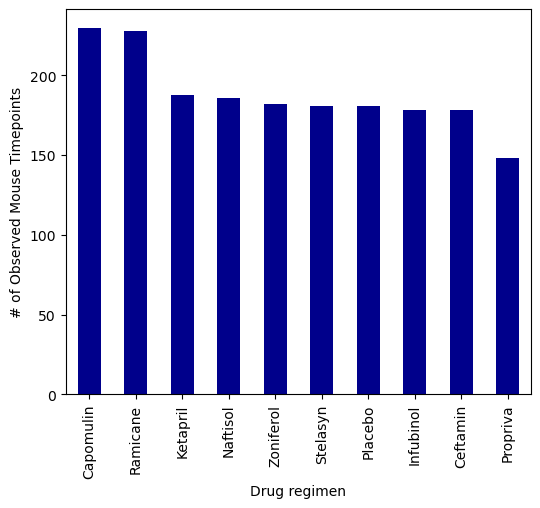

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_mouse_df["Drug Regimen"].value_counts()

drug_regimen_counts.plot(kind="bar", figsize=(6,5), color="darkblue")

plt.xlabel("Drug regimen")
plt.ylabel("# of Observed Mouse Timepoints")


plt.show()

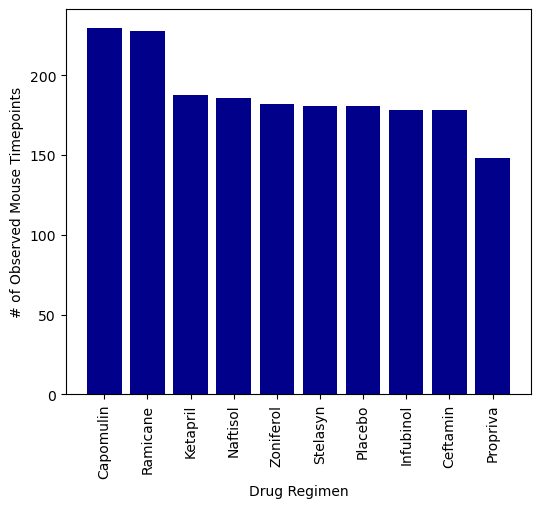

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_mouse_df["Drug Regimen"].value_counts()

plt.figure(figsize=(6, 5))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color="darkblue")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(rotation=90)
plt.show()

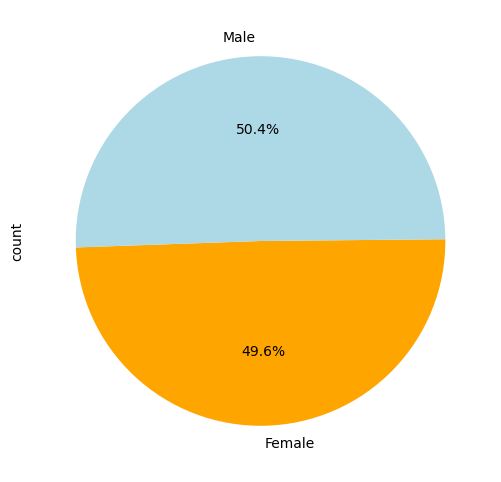

In [19]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = clean_mouse_df.groupby("Sex")["Mouse ID"].nunique()


# Make the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=182, figsize=(6, 6), labels=gender_counts.index, colors=["orange", "lightblue"])

plt.ylabel("count") 

plt.show()

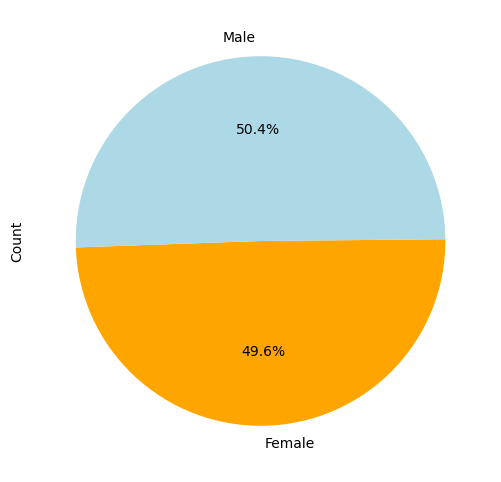

In [20]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = clean_mouse_df.groupby("Sex")["Mouse ID"].nunique()

# Make the pie chart

values = gender_counts.values
labels = gender_counts.index

plt.figure(figsize=(6, 6))
plt.pie(
    values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=182,
    colors=["orange", "lightblue"]
)

plt.ylabel("Count")

plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_greatest = mousedata_studyresults.groupby(["Mouse ID"])["Timepoint"].max()
mice_greatest = mice_greatest.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data = pd.merge(mice_greatest, mousedata_studyresults, on=["Mouse ID", "Timepoint"], how="left")

merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
# Put treatments into a list for for loop (and later for plot labels)

treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug_regimens in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_drug = merged_data.loc[mousedata_studyresults["Drug Regimen"]== drug_regimens,"Tumor Volume (mm3)"]

    # add subset
    volume_data.append(mice_drug)

    # Determine outliers using upper and lower bounds
    quantiles = mice_drug.quantile([0.25, 0.5, 0.75])
    lower = quantiles[0.25]
    upper = quantiles[0.75]
    iqr = upper - lower
    lowerbound = lower - (1.5 * iqr)
    upperbound = upper + (1.5 * iqr)
    
    outliers = mice_drug[(mice_drug < lowerbound) | (mice_drug > upperbound)]  # potential outliers

    print(f"{drug_regimens}:")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lowerbound}")
    print(f"Upper Bound: {upperbound}")
    print(f"Potential Outliers: {outliers.tolist()}")
    print("----------")

Capomulin:
IQR: 18.901949147500012
Lower Bound: 17.727772116249977
Upper Bound: 93.33556870625003
Potential Outliers: []
----------
Ramicane:
IQR: 22.28962147
Lower Bound: 11.565567795
Upper Bound: 100.724053675
Potential Outliers: []
----------
Infubinol:
IQR: 20.81516535
Lower Bound: 13.777251974999999
Upper Bound: 97.037913375
Potential Outliers: []
----------
Ceftamin:
IQR: 18.94327836
Lower Bound: 14.75145512
Upper Bound: 90.52456856
Potential Outliers: []
----------


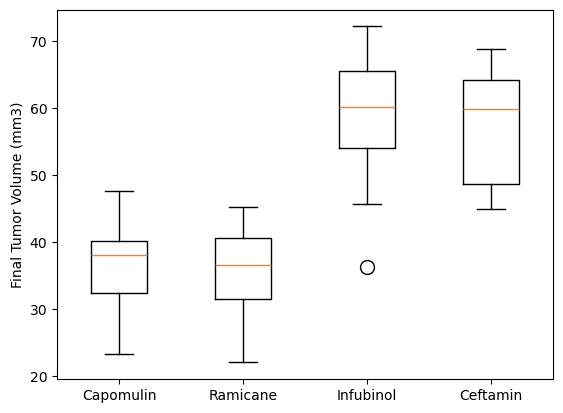

In [23]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

volume_data = [merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"].dropna()
    for drug in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]

# Generate the box plot
fig, ax = plt.subplots()
box = ax.boxplot(
    volume_data, 
    tick_labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],  
    meanline=True, 
    flierprops={'marker': 'o', 'color':'red', 'markersize': 10}
)

# Add labels and title
ax.set_ylabel("Final Tumor Volume (mm3)")


# Show the plot
plt.show()

## Line and Scatter Plots

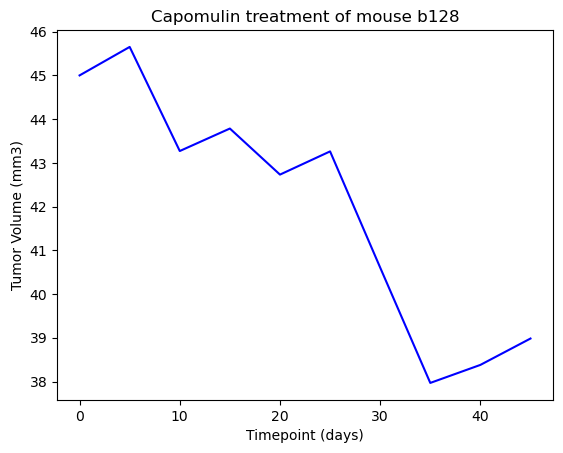

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


capomulin_mouse_id = clean_mouse_df[clean_mouse_df["Drug Regimen"] == "Capomulin"]["Mouse ID"].iloc[0] # mouse ID treated with Capomulin


mouse_data = clean_mouse_df[clean_mouse_df["Mouse ID"] == capomulin_mouse_id] # Filtering the data for this specific mouse


plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color="blue")


plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {capomulin_mouse_id}")


plt.show()

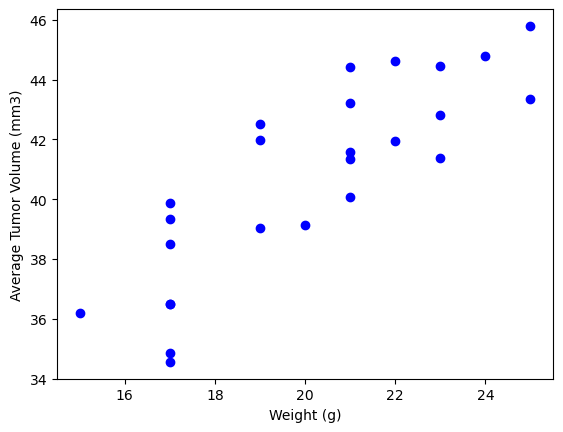

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data_regimen = clean_mouse_df[clean_mouse_df["Drug Regimen"] == "Capomulin"]

average_observedtumor_volume = capomulin_data_regimen.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_weight = capomulin_data_regimen.groupby("Mouse ID")["Weight (g)"].first()

scatter_data = pd.DataFrame({
    "Weight (g)": mouse_weight,
    "Average Tumor Volume (mm3)": average_observedtumor_volume
})

plt.scatter(scatter_data["Weight (g)"], scatter_data["Average Tumor Volume (mm3)"], color="blue")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.84


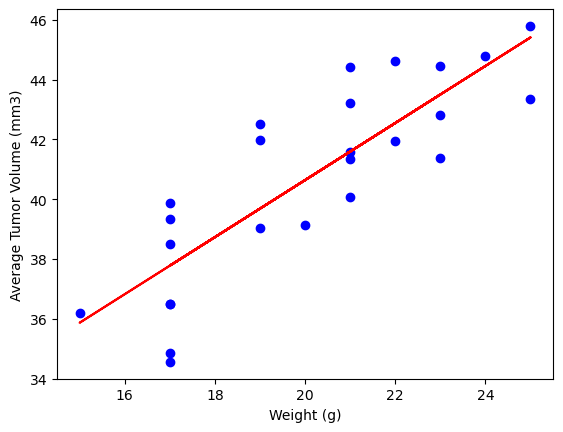

In [26]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(scatter_data["Weight (g)"], scatter_data["Average Tumor Volume (mm3)"])

regression_line = slope * scatter_data["Weight (g)"] + intercept
 
plt.scatter(scatter_data["Weight (g)"], scatter_data["Average Tumor Volume (mm3)"], color="blue", label="Data") 

plt.plot(scatter_data["Weight (g)"], regression_line, color="red", label="Regression Line")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

correlation = scatter_data["Weight (g)"].corr(scatter_data["Average Tumor Volume (mm3)"])
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}") 

plt.show()